In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig
sns.set()

## Q1.

#### First, the model is simulated using reference parameter values and the system is stimulated at V1. Due to long rate excitatory connectivity, the activity spreads over all areas of the cortex. This is captured by Figure 1: time series of activation across all cortical areas. Computing the autocorrelation fuction (ACF) and fitting an exponential decay to each ACF, we can determine the time-constant of the decay. We can see that the time-constants appear to be lower for earlier areas with lower hierarchy and tend to be higher for areas with higher in hierarchy. However, this appears to be also determined by the nature of inter-area connectivity for each region. For example, area 8m which is lower in hierarchy has a higher time constant, owing to its interconnectedness to other areas. For the 14 areas plotted here, the time-constants appear to be vary from 150 ms to almost 0.5 seconds.

Initializing Model. From subgraph_data.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
Initializing Model. From subgraph_data.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
Running network with stimulation to V1


<Figure size 500x1000 with 0 Axes>

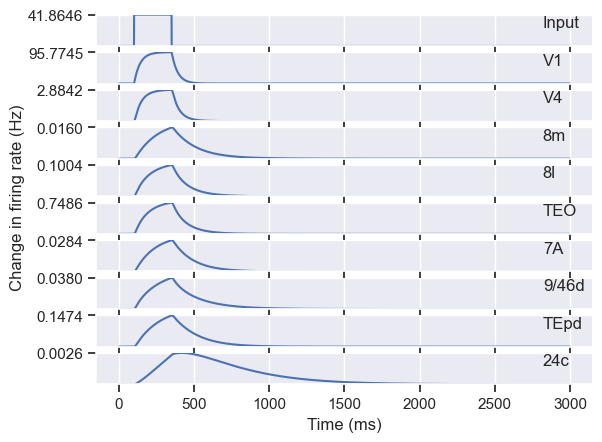

Computing ACF. Depending on the lag, this will take some time ...


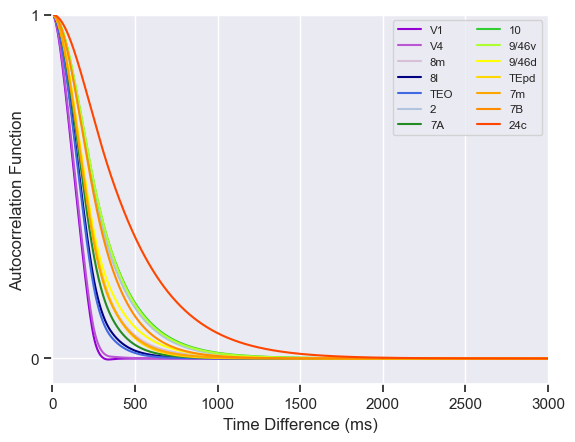

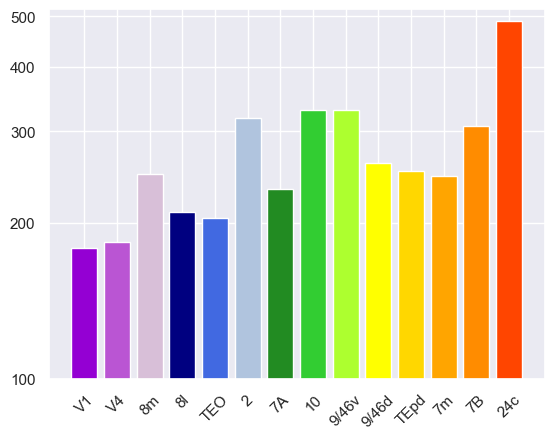

In [2]:
execfile('chaudhuri2015.py')
if __name__ == '__main__':
    control = Model()
    control.__init__(datafile='subgraph_data.pkl', seed = 42, macroGradient = True, ext_params={})
    control.run_stimulus(T = 5000, noise=False, area_act = 'V1', plot_t_interval = [0, 3000]) 

    control.calculate_acf(t_interval = [0, 5000], acf_length=3000, plot = True)

    control.compute_time_constants(plot = False)
    area_name_list = ['V1','V4','8m','8l','TEO','2','7A','10','9/46v','9/46d','TEpd','7m','7B','24c']
    area_idx_list = [control.p['areas'].index(name) for name in area_name_list]
    cs = ['darkviolet','mediumorchid','thistle','navy','royalblue','lightsteelblue','forestgreen','limegreen','greenyellow','yellow','gold','orange','darkorange','orangered']
    hierarchy = control.p['hier_vals'][area_idx_list]
    tc_to_plot = []
    for i in area_idx_list:
        tc_to_plot.append(control.tc[i])
    plt.figure()
    plt.bar(area_name_list, tc_to_plot, color = cs )
    plt.yscale('log')
    plt.yticks([])
    plt.yticks(ticks = [100, 200, 300, 400, 500], labels = ['100', '200', '300', '400','500'], minor = False)
    plt.xticks(rotation = 45)
    plt.show()

## Q2.

#### Here the macroscopic gradient of synaptic excitation is turned off and the simulation is run again. We can see that this turns down the effect of hierarchy on time-constants completely. Specifically, all regions except V1 which is being stimulated end up having higher time constants around 400-500 ms. Therefore, the macroscopic gradient of synaptic excitation appears to drive the hierarchical trend that we observe in the figure above.

Initializing Model. From subgraph_data.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
Initializing Model. From subgraph_data.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
Running network with stimulation to V1


<Figure size 500x1000 with 0 Axes>

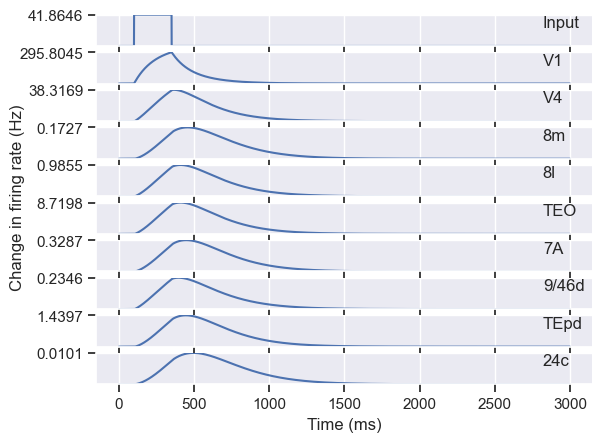

Computing ACF. Depending on the lag, this will take some time ...


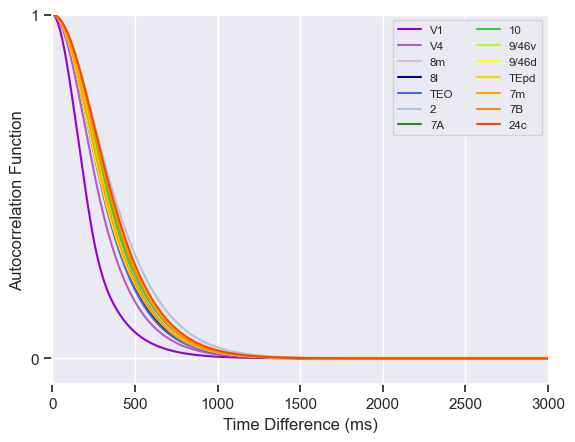

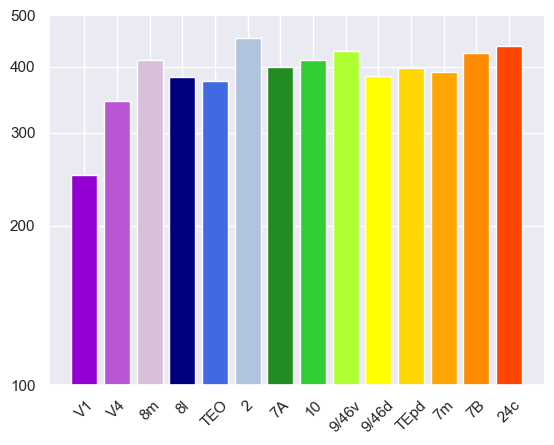

In [3]:
execfile('chaudhuri2015.py')
if __name__ == '__main__':
    nogradient = Model()
    nogradient.__init__(datafile='subgraph_data.pkl', seed = 42, macroGradient = False, ext_params={})
    nogradient.run_stimulus(T = 5000, noise=False, area_act = 'V1', plot_t_interval = [0, 3000]) 

    nogradient.calculate_acf(t_interval = [0, 5000], acf_length=3000, plot = True)

    nogradient.compute_time_constants(plot = False)
    area_name_list = ['V1','V4','8m','8l','TEO','2','7A','10','9/46v','9/46d','TEpd','7m','7B','24c']
    area_idx_list = [nogradient.p['areas'].index(name) for name in area_name_list]
    cs = ['darkviolet','mediumorchid','thistle','navy','royalblue','lightsteelblue','forestgreen','limegreen','greenyellow','yellow','gold','orange','darkorange','orangered']
    hierarchy = nogradient.p['hier_vals'][area_idx_list]
    tc_to_plot = []
    for i in area_idx_list:
        tc_to_plot.append(nogradient.tc[i])
    plt.figure()
    plt.bar(area_name_list, tc_to_plot, color = cs )
    plt.yscale('log')
    plt.yticks([])
    plt.yticks(ticks = [100, 200, 300, 400, 500], labels = ['100', '200', '300', '400','500'], minor = False)
    plt.xticks(rotation = 45)
    plt.show()

## BONUS:

#### In order to make the system linear, the control model is re-run with noise = True so that all areas have positive firing rates. Performing eigendecompisition on the functional conenctivity matrix, we can see that the eigenvalues decrease along the hierarchy. Eigenvalues in this case are -1/time-constant and since time-constants increase along the hierarchy, it makes sense to see decreaseing eigenvalues.
#### Looking at the eigenvectors and their projections across each cortical area, we can see that the earlier cortical areas have higher projection weights.

Initializing Model. From subgraph_data.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
Initializing Model. From subgraph_data.pkl load:
dict_keys(['fln_mat', 'sln_mat', 'hier_vals', 'areas'])
Running network with stimulation to V1


<Figure size 500x1000 with 0 Axes>

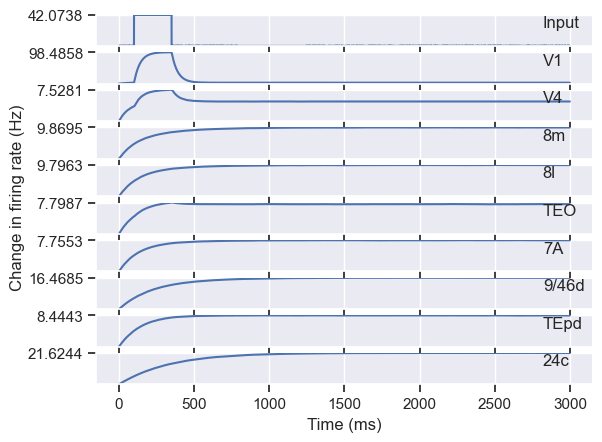

Computing ACF. Depending on the lag, this will take some time ...


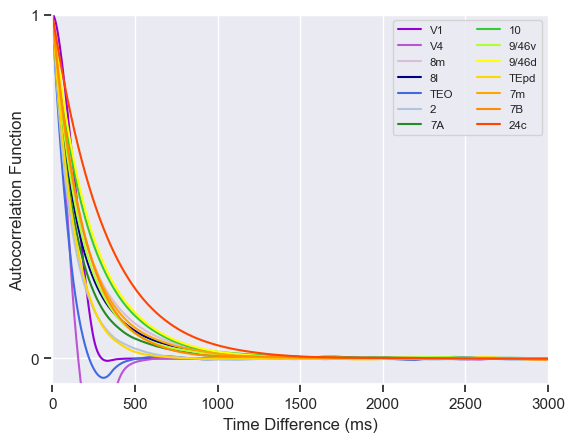

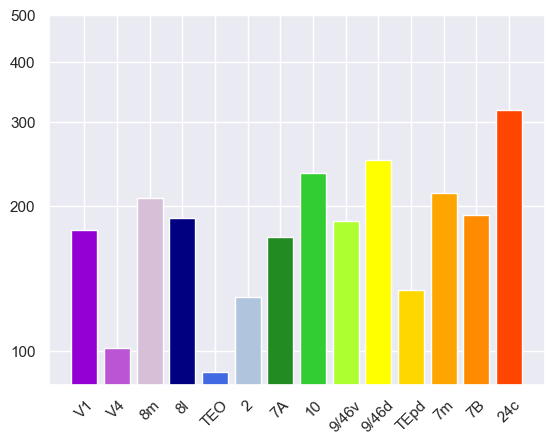

In [4]:
execfile('chaudhuri2015.py')
if __name__ == '__main__':
    control = Model()
    control.__init__(datafile='subgraph_data.pkl', seed = 42, macroGradient = True, ext_params={})
    control.run_stimulus(T = 5000, noise=True, area_act = 'V1', plot_t_interval = [0, 3000]) 

    control.calculate_acf(t_interval = [0, 5000], acf_length=3000, plot = True)

    control.compute_time_constants(plot = False)
    area_name_list = ['V1','V4','8m','8l','TEO','2','7A','10','9/46v','9/46d','TEpd','7m','7B','24c']
    area_idx_list = [control.p['areas'].index(name) for name in area_name_list]
    cs = ['darkviolet','mediumorchid','thistle','navy','royalblue','lightsteelblue','forestgreen','limegreen','greenyellow','yellow','gold','orange','darkorange','orangered']
    hierarchy = control.p['hier_vals'][area_idx_list]
    tc_to_plot = []
    for i in area_idx_list:
        tc_to_plot.append(control.tc[i])
    plt.figure()
    plt.bar(area_name_list, tc_to_plot, color = cs )
    plt.yscale('log')
    plt.yticks([])
    plt.yticks(ticks = [100, 200, 300, 400, 500], labels = ['100', '200', '300', '400','500'], minor = False)
    plt.xticks(rotation = 45)
    plt.show()

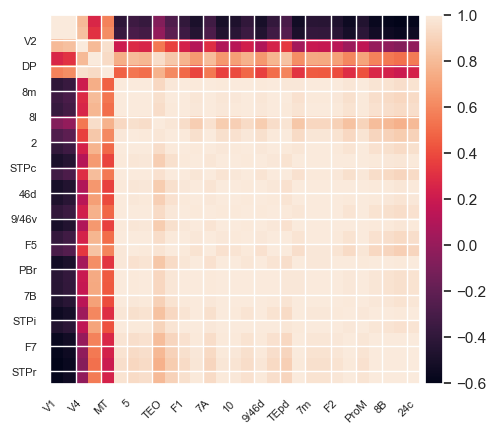

In [5]:
control.calculate_fc(t_interval = [0, 5000], plot = True)
W = control.fc
L, v = np.linalg.eig(W)

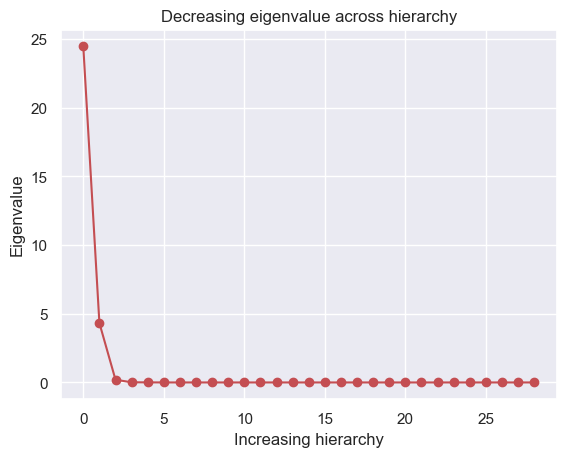

In [6]:
plt.figure()
plt.plot(L, 'ro-')
plt.xlabel('Increasing hierarchy')
plt.ylabel('Eigenvalue')
plt.title('Decreasing eigenvalue across hierarchy')
plt.show()


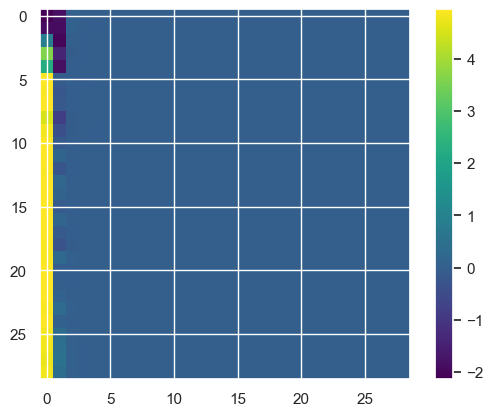

In [7]:
plt.figure()
plt.imshow(W@(v), cmap = 'viridis')
plt.colorbar()
plt.show()